In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers


2023-09-23 08:47:13.252296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# cargamos los datos 
with open('../../data/datasets/noisy_sin_singleCurve_dataset.npz', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [4]:
X

array([0.        , 0.0032032 , 0.00640641, 0.00960961, 0.01281281,
       0.01601602, 0.01921922, 0.02242242, 0.02562563, 0.02882883,
       0.03203203, 0.03523524, 0.03843844, 0.04164164, 0.04484484,
       0.04804805, 0.05125125, 0.05445445, 0.05765766, 0.06086086,
       0.06406406, 0.06726727, 0.07047047, 0.07367367, 0.07687688,
       0.08008008, 0.08328328, 0.08648649, 0.08968969, 0.09289289,
       0.0960961 , 0.0992993 , 0.1025025 , 0.10570571, 0.10890891,
       0.11211211, 0.11531532, 0.11851852, 0.12172172, 0.12492492,
       0.12812813, 0.13133133, 0.13453453, 0.13773774, 0.14094094,
       0.14414414, 0.14734735, 0.15055055, 0.15375375, 0.15695696,
       0.16016016, 0.16336336, 0.16656657, 0.16976977, 0.17297297,
       0.17617618, 0.17937938, 0.18258258, 0.18578579, 0.18898899,
       0.19219219, 0.1953954 , 0.1985986 , 0.2018018 , 0.20500501,
       0.20820821, 0.21141141, 0.21461461, 0.21781782, 0.22102102,
       0.22422422, 0.22742743, 0.23063063, 0.23383383, 0.23703

In [6]:
# creamos el modelo de RNA
model = K.Sequential()

model.add(layers.Dense(units=1, activation='linear', input_shape=[1]))
# model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=3, activation='relu'))
model.add(layers.Dense(units=2, activation='relu'))
#model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 3)                 6         
                                                                 
 dense_6 (Dense)             (None, 2)                 8         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 5s 7ms/step - loss: 0.4439
Epoch 2/500
32/32 [==============================] - 0s 8ms/step - loss: 0.3251
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.1945
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 0.1225
Epoch 5/500
32/32 [==============================] - 0s 8ms/step - loss: 0.0982
Epoch 6/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0913
Epoch 7/500
32/32 [==============================] - 0s 7ms/step - loss: 0.0876
Epoch 8/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0840
Epoch 9/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0799
Epoch 10/500
32/32 [==============================] - 0s 11ms/step - loss: 0.0752
Epoch 11/500
32/32 [==============================] - 0s 10ms/step - loss: 0.0699
Epoch 12/500
32/32 [==============================] - 0s 9ms/step - loss: 0.0642
Epoch 13/500
32/32 [==============

In [8]:
y_predicted = model.predict(X)

32/32 [==============================] - 0s 3ms/step


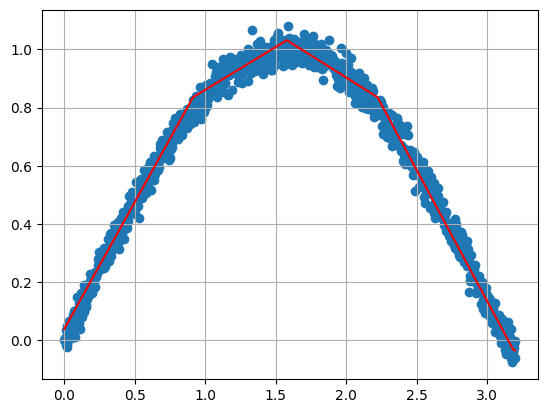

In [9]:
plt.scatter(X, y)
plt.plot(X, y_predicted, 'r-')
plt.grid(True)
plt.show()

In [10]:
pred = model.predict([[0.0032032032032032033]])
pred

1/1 [==============================] - 0s 192ms/step


array([[0.04240942]], dtype=float32)

In [17]:
for i, layer in enumerate(model.layers):
    print('*'*25)
    print(model.layers[i].weights)

*************************
[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.5358084]], dtype=float32)>, <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.4221617], dtype=float32)>]
*************************
[<tf.Variable 'dense_5/kernel:0' shape=(1, 3) dtype=float32, numpy=array([[ 1.0464344 ,  0.31964287, -0.20282179]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(3,) dtype=float32, numpy=array([0.44382837, 0.41102475, 0.17832378], dtype=float32)>]
*************************
[<tf.Variable 'dense_6/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.78796256,  1.4331942 ],
       [ 1.5954595 , -1.6701915 ],
       [ 0.44938034,  1.1279454 ]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.11961418, -0.1008855 ], dtype=float32)>]
*************************
[<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.3534938],
       [-1.4600034]], dtype=float32)>, <tf.